# Cleaning, Formatting and Analysing Steam data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Loading data
steam_data = pd.read_csv('Datasets/steam.csv')

## Observing data

In [3]:
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
steam_data.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [5]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [6]:
steam_data.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

# Feature Engineering

In [7]:
# Keep release year only
steam_data["release_date"] = steam_data["release_date"].apply(lambda x: x.split("-")[0])

# total ratings
steam_data["total_ratings"] = steam_data["positive_ratings"] + steam_data["negative_ratings"]

# rating out of 100
steam_data["rating"] = 100 * steam_data["positive_ratings"] / steam_data["total_ratings"] 
# steam_data.drop(["positive_ratings", "negative_ratings"], 1, inplace=True)

## One hot encode

In [8]:
# Split them to prepare for one hot encoding
steam_data["steamspy_tags"] = steam_data["steamspy_tags"].apply(lambda x: x.split(";"))
steam_data["genres"] = steam_data["genres"].apply(lambda x: x.split(";"))
steam_data["categories"] = steam_data["categories"].apply(lambda x: x.lower().split(";"))
# steam_data["platforms"] = steam_data["platforms"].apply(lambda x: x.split(";"))

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

def one_hot_encode(lst):
    """generate sparse matrix from list"""  
    mlb = MultiLabelBinarizer(sparse_output=True)
    oh_encodes = pd.DataFrame.sparse.from_spmatrix(
            mlb.fit_transform(lst),
            index=steam_data.index,
            columns=mlb.classes_
        )
    return oh_encodes

### Genres

In [10]:
genres_oh = one_hot_encode(steam_data['genres'])
genres_counts = [len(genres_oh[genres_oh[c]>0][c]) for c in genres_oh.columns] # counts for each genre
pd.DataFrame(genres_counts, columns=['genres_counts']).describe()

,genres_counts
count,29.000000
mean,2636.620690
std,4672.696517
min,1.000000
25%,31.000000
50%,266.000000
75%,2954.000000
max,19421.000000


In [11]:
# remove genres that have less than the 25th percentile of the overall counts
q1 = np.percentile(genres_counts, 25)
genres_to_remove= []
for i, c in enumerate(genres_counts): 
    if c < q1:
        genres_to_remove.append(genres_oh.columns[i])
genres_oh.drop(genres_to_remove, axis=1, inplace=True)

# add one hot encoded columns to main data
steam_data_encoded = steam_data.join(genres_oh)
steam_data_encoded.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,RPG,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,"[multi-player, online multi-player, local mult...",[Action],...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,"[multi-player, online multi-player, local mult...",[Action],...,0,0,0,0,0,0,0,0,0,0


In [12]:
genres = pd.DataFrame(genres_oh.columns.tolist(), columns=["genres"])
genres.to_csv('Datasets/genres.csv', index=False)

### Steamspy tags

In [13]:
len(one_hot_encode(steam_data['steamspy_tags']).columns)

339

Since there are 339 types of tags, one hot encoding them would massively increase the size of the dataset. The genres attribute seems to capture faily similar information, so this attribute will be dropped. 

### Categories

In [14]:
cats_oh = one_hot_encode(steam_data['categories'])
for i in zip(cats_oh.columns, [len(cats_oh[cats_oh[c]>0][c]) for c in cats_oh.columns]):
    print(i)

('captions available', 721)
('co-op', 1721)
('commentary available', 144)
('cross-platform multiplayer', 1081)
('full controller support', 5695)
('in-app purchases', 690)
('includes level editor', 1036)
('includes source sdk', 35)
('local co-op', 1059)
('local multi-player', 1615)
('mmo', 421)
('mods', 2)
('mods (require hl2)', 1)
('multi-player', 3974)
('online co-op', 1071)
('online multi-player', 2487)
('partial controller support', 4234)
('shared/split screen', 2152)
('single-player', 25678)
('stats', 1878)
('steam achievements', 14130)
('steam cloud', 7219)
('steam leaderboards', 3439)
('steam trading cards', 7918)
('steam turn notifications', 63)
('steam workshop', 897)
('steamvr collectibles', 40)
('valve anti-cheat enabled', 94)
('vr support', 231)


In [15]:
# add a boolean column, true if game is multiplayer. Same for local, co-op, singleplayer
def str_in_list(lst1, lst2):
    """Return true if any string item in lst1 is present in lst2"""
    for s2 in lst2:
        for s1 in lst1:
            if s1 in s2:
                return True
    return False

# multiplayer
l = ['multiplayer', 'multi-player', 'mmo']
steam_data_encoded["multiplayer"] = steam_data["categories"].apply(lambda x: str_in_list(l, x))

# local
steam_data_encoded["local"] = steam_data["categories"].apply(lambda x: str_in_list(['local'], x))

# co-op
steam_data_encoded["coop"] = steam_data["categories"].apply(lambda x: str_in_list(['co-op'], x))

# singleplayer
steam_data_encoded["singleplayer"] = steam_data["categories"].apply(lambda x: str_in_list(['single-player'], x))

steam_data_encoded.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,"[multi-player, online multi-player, local mult...",[Action],...,0,0,0,0,0,0,True,True,False,False
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,"[multi-player, online multi-player, local mult...",[Action],...,0,0,0,0,0,0,True,True,False,False


## Outliers

In [16]:
steam_data['english'].value_counts()

1    26564
0      511
Name: english, dtype: int64

In [17]:
steam_data_encoded['required_age'].value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

Since most games are english, we will discard all non english games for this. Also, since most games don't have a required age anyways, this column will not contribute much and therefore will be removed from the dataset. Some other irrelevant features have also been dropped as well

In [18]:
steam_data_encoded = steam_data_encoded[steam_data_encoded['english'] == 1]
to_drop = ['required_age', 'english', 'achievements', 'publisher']
steam_data_encoded.drop(to_drop, 1, inplace=True)
print(len(steam_data_encoded))
steam_data_encoded.head()

26564


,appid,name,release_date,developer,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
0,10,Counter-Strike,2000,Valve,windows;mac;linux,"[multi-player, online multi-player, local mult...",[Action],"[Action, FPS, Multiplayer]",124534,3339,...,0,0,0,0,0,0,True,True,False,False
1,20,Team Fortress Classic,1999,Valve,windows;mac;linux,"[multi-player, online multi-player, local mult...",[Action],"[Action, FPS, Multiplayer]",3318,633,...,0,0,0,0,0,0,True,True,False,False
2,30,Day of Defeat,2003,Valve,windows;mac;linux,"[multi-player, valve anti-cheat enabled]",[Action],"[FPS, World War II, Multiplayer]",3416,398,...,0,0,0,0,0,0,True,False,False,False
3,40,Deathmatch Classic,2001,Valve,windows;mac;linux,"[multi-player, online multi-player, local mult...",[Action],"[Action, FPS, Multiplayer]",1273,267,...,0,0,0,0,0,0,True,True,False,False
4,50,Half-Life: Opposing Force,1999,Gearbox Software,windows;mac;linux,"[single-player, multi-player, valve anti-cheat...",[Action],"[FPS, Action, Sci-fi]",5250,288,...,0,0,0,0,0,0,True,False,False,True


In [19]:
steam_data_encoded.columns

Index(['appid', 'name', 'release_date', 'developer', 'platforms', 'categories',
       'genres', 'steamspy_tags', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'total_ratings', 'rating', 'Action', 'Adventure',
       'Animation & Modeling', 'Casual', 'Design & Illustration',
       'Early Access', 'Education', 'Free to Play', 'Gore', 'Indie',
       'Massively Multiplayer', 'Nudity', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Violent', 'multiplayer', 'local', 'coop',
       'singleplayer'],
      dtype='object')

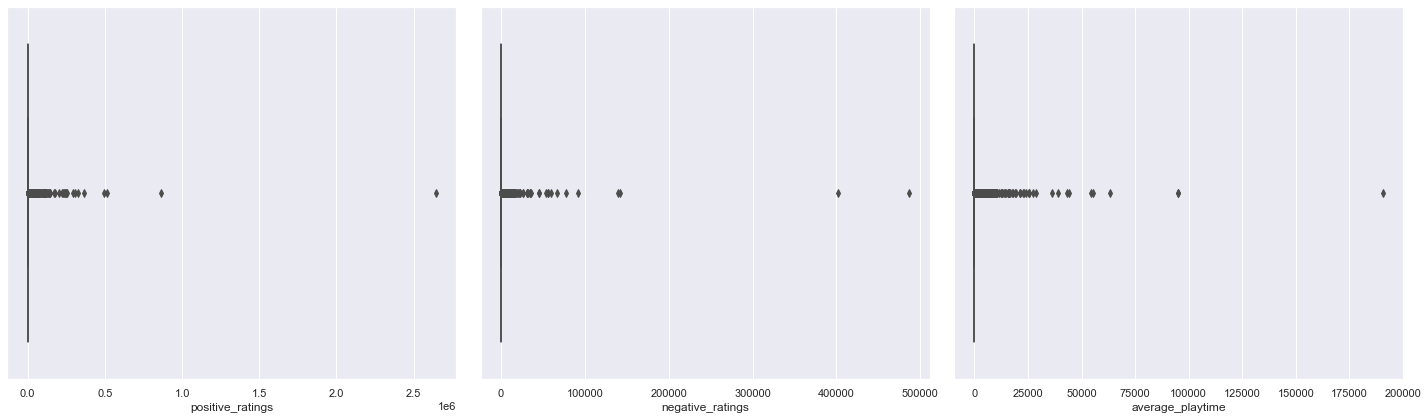

In [20]:
cols = ['positive_ratings', 'negative_ratings', 'average_playtime']

sns.set_style('darkgrid')
f, axes = plt.subplots(1,3, figsize=(20,6))  
i = 0
for name in cols:
    b=sns.boxplot(x=steam_data_encoded[name], ax=axes[i])
    b.set_xlabel(name)
    i = i+1

plt.tight_layout()
plt.show()

In [21]:
steam_data_encoded["owners"].value_counts()

0-20000                18166
20000-50000             3016
50000-100000            1676
100000-200000           1373
200000-500000           1268
500000-1000000           513
1000000-2000000          287
2000000-5000000          192
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

### Analyzing various numeric features

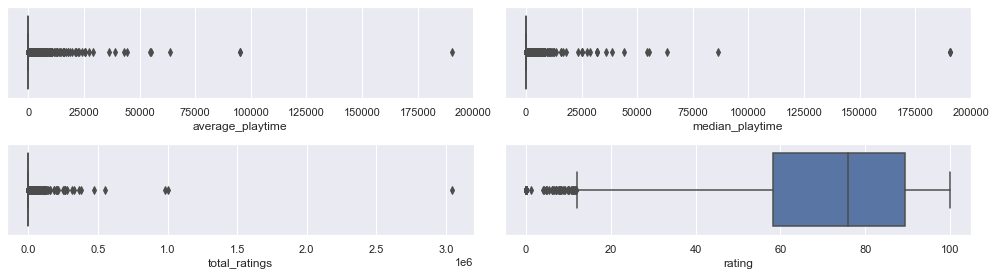

In [22]:
cols = ['average_playtime', 'median_playtime', 'total_ratings', 'rating']

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(14,4))  
y = 0

for c in cols:
    i, j = divmod(y, 2)
    ax = axes[i, j]
    b=sns.boxplot(data=steam_data_encoded, x=c, ax=ax)
    y = y+1

plt.tight_layout()
plt.show()

In [23]:
steam_data_encoded.sort_values("total_ratings",ascending=False)[:5]

,appid,name,release_date,developer,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
25,730,Counter-Strike: Global Offensive,2012,Valve;Hidden Path Entertainment,windows;mac;linux,"[multi-player, steam achievements, full contro...","[Action, Free to Play]","[FPS, Multiplayer, Shooter]",2644404,402313,...,0,0,0,0,0,0,True,False,False,False
22,570,Dota 2,2013,Valve,windows;mac;linux,"[multi-player, co-op, steam trading cards, ste...","[Action, Free to Play, Strategy]","[Free to Play, MOBA, Strategy]",863507,142079,...,0,0,1,0,0,0,True,False,True,False
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,PUBG Corporation,windows,"[multi-player, online multi-player, stats]","[Action, Adventure, Massively Multiplayer]","[Survival, Shooter, Multiplayer]",496184,487076,...,0,0,0,0,0,0,True,False,False,False
19,440,Team Fortress 2,2007,Valve,windows;mac;linux,"[multi-player, cross-platform multiplayer, ste...","[Action, Free to Play]","[Free to Play, Multiplayer, FPS]",515879,34036,...,0,0,0,0,0,0,True,False,False,False
2478,271590,Grand Theft Auto V,2015,Rockstar North,windows,"[single-player, multi-player, steam achievemen...","[Action, Adventure]","[Open World, Action, Multiplayer]",329061,139308,...,0,0,0,0,0,0,True,False,False,True


Although these are outliers, these games are indeed widely popular and should not be removed.

In [24]:
cols = ['name', 'release_date','total_ratings', 'rating', 'owners', 'average_playtime', 'median_playtime']
steam_data_encoded.sort_values("average_playtime",ascending=False)[:20][cols]

,name,release_date,total_ratings,rating,owners,average_playtime,median_playtime
9201,The Abbey of Crime Extensum,2016,168,86.904762,50000-100000,190625,190625
1478,The Banner Saga: Factions,2013,771,73.800259,200000-500000,95245,190489
6014,The Secret of Tremendous Corporation,2015,268,81.343284,100000-200000,95242,190445
8969,PRICE,2016,4431,94.741593,200000-500000,63481,63490
3930,Boundless,2018,1639,70.347773,20000-50000,55204,55204
3969,Shroud of the Avatar: Forsaken Virtues,2018,2082,51.152738,50000-100000,54618,54618
2435,X-Plane 11,2017,2476,82.108239,100000-200000,44169,44169
2023,Fantasy Grounds,2014,477,79.035639,20000-50000,43074,86148
8919,Screeps,2016,833,88.355342,20000-50000,38805,38805
12195,The Price of Freedom,2016,355,93.802817,50000-100000,36029,36029


In [25]:
steam_data_encoded[steam_data_encoded['name']=='Counter-Strike']["average_playtime"]

0    17612
Name: average_playtime, dtype: int64

The attributes average_playtime and median_playtime are strange. The games with highest average playtime show strange behaviour here. These indeed look like outliers. A check on the [steam website](https://astats.astats.nl/astats/Steam_Games.php?Sort=8) shows that its highest average playtime was around 1700 hours (as of December 2021) and none of those top 10 found here feature on the website. Also, the median and mean either have a big disparity or they are exactly the same, which is uncommon. Dota 2 which is considered one of the most played games today has a very large disparity between its average (23944) and median playtime (801). Unfortunately, the author of the dataset has not given more information how these values have been retrieved.
<br>

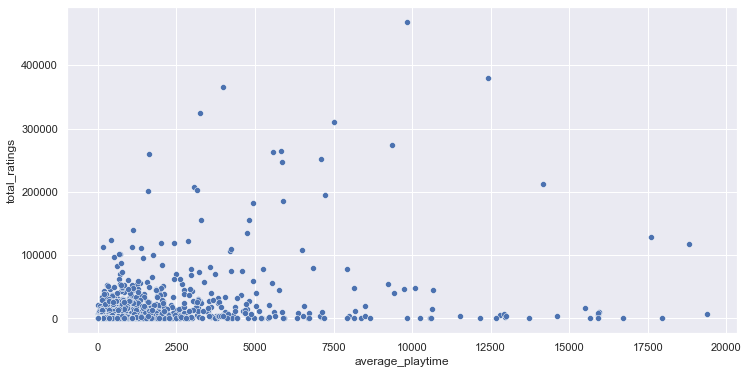

In [26]:
plt.figure(figsize=(12,6))
temp = steam_data_encoded[(steam_data_encoded['average_playtime'] < 20000) & (steam_data_encoded['total_ratings'] < 500000)]
sns.scatterplot(data=temp, x='average_playtime', y="total_ratings")
plt.show()

### Looking at the main categories

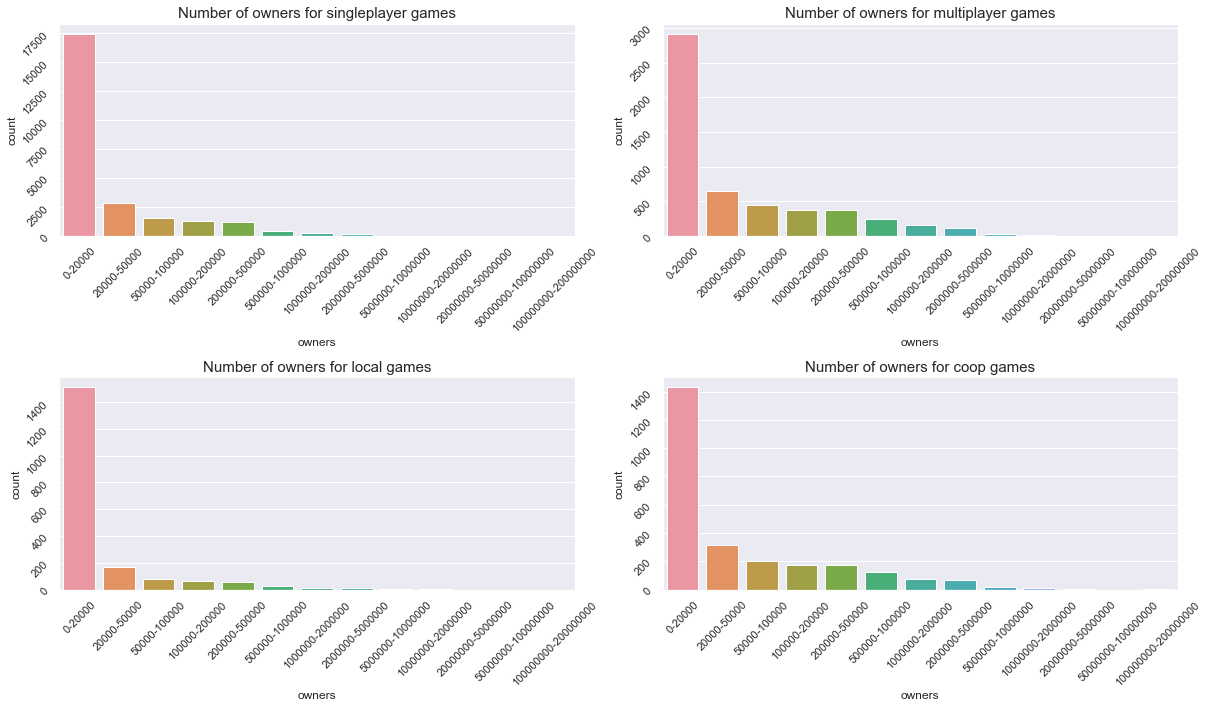

In [27]:
cols = ['singleplayer', 'multiplayer', 'local', 'coop']

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(17,10))  
y = 0

order = sorted(steam_data_encoded["owners"].unique(), key=lambda x: int(x.split('-')[0]))
for c in cols:
    i, j = divmod(y, 2)
    ax = axes[i, j]
    b=sns.countplot(data=steam_data_encoded[steam_data_encoded[c]], x="owners", ax=ax, order=order)
    ax.set_title(f"Number of owners for {c} games", fontsize=15)
    ax.tick_params(labelrotation=45)
    y = y+1

plt.tight_layout()
plt.show()

We can see that there is some variance in the distribution of sales for those 4 categories and therefore, they do affect the number of owners a bit, therefore, they will be kept in the data as features to be considered when training the data

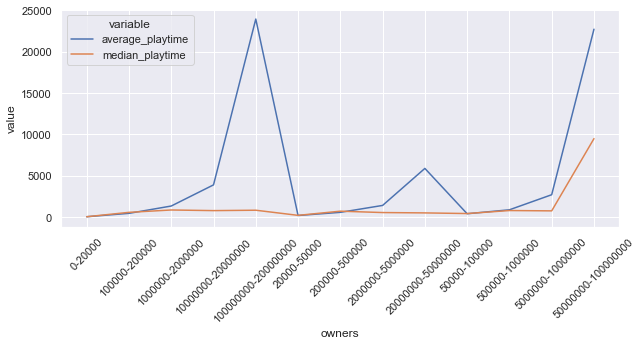

In [28]:
plt.figure(figsize=(10,4))
temp = steam_data_encoded[['owners', 'average_playtime', 'median_playtime']].groupby('owners').mean().reset_index()
sns.lineplot(x="owners", y='value', hue="variable",
             data=pd.melt(temp, id_vars=['owners'], value_vars=["average_playtime", "median_playtime"]))
plt.xticks(rotation=45)
plt.show()

Here, it looks like the average playtime is a better indicative of the how good the game is (by the number of owners), even though it's a bit hard to see, as the number of owners increase, so does the average playtime.

<br>
After analysing and cleaning the data, the most important features that will be used for training the data will be kept and the rest will be discarded

In [29]:
steam_data_encoded.columns

Index(['appid', 'name', 'release_date', 'developer', 'platforms', 'categories',
       'genres', 'steamspy_tags', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'total_ratings', 'rating', 'Action', 'Adventure',
       'Animation & Modeling', 'Casual', 'Design & Illustration',
       'Early Access', 'Education', 'Free to Play', 'Gore', 'Indie',
       'Massively Multiplayer', 'Nudity', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Violent', 'multiplayer', 'local', 'coop',
       'singleplayer'],
      dtype='object')

In [30]:
dropped_cols = ['release_date', 'developer', 'platforms', 'categories', 'steamspy_tags',
                'genres', 'positive_ratings', 'negative_ratings', 'median_playtime', 'price', 'total_ratings']
cleaned_data = steam_data_encoded.drop(dropped_cols, 1)
cleaned_data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,0,0,0,0,0,0,True,False,False,True


In [31]:
# Exporting the data
cleaned_data.to_csv('Datasets/cleaned_steam_data.csv', index=False)

## Scrapped analysis

~~Although not completely clean, due to the severely biased data, we can see some sort of correlation with positive ratings and average playtime with respect to number of owners of the game, which can show that, the more positive and playtime it gets, the more popular it is.~~

~~As for the negative ratings, it looks like there are 3 different types of relationships, where at the start, there aren't a lot of negative ratings for low number of owners, which then drastically increases with more owners then decreased again after a certain value. However, this sharp decrease after 0.75e8 might be due to the outliers in the data~~